<a href="https://colab.research.google.com/github/wajidminhas/AI-Agents/blob/main/tool_calling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q -U langchain-google-genai langchain_core langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.2 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
gemini_api_key = userdata.get("GEMINI_API_KEY")

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

resnponse : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

**Function/Tool Calling**

In [4]:
print(resnponse)


model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7d1d91e22e60> default_metadata=()


In [5]:
# here creating a function

def bank_depost(name : str, amount: int, account_id: int):
  """Desposit amount into bank account

  argument
  name : str
  amount : int
  account_id : int

  return
  str
  """
  return f"successfully deposited {amount} into account {name} {account_id}"

In [6]:
tool_calling = resnponse.bind_tools([bank_depost])

In [7]:
tool_calling

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7d1d91e22e60>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'bank_depost', 'description': 'Desposit amount into bank account argument\nname : str\namount : int\naccount_id : int return\nstr', 'parameters': {'properties': {'name': {'type': 'string'}, 'amount': {'type': 'integer'}, 'account_id': {'type': 'integer'}}, 'required': ['name', 'amount', 'account_id'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [8]:
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

In [9]:
call = resnponse.invoke([HumanMessage(content="depost 10000 amount in wajid account and account id is 45729438752")])

In [10]:
call

AIMessage(content="I cannot directly deposit money into bank accounts. I am a large language model, an AI.  I do not have access to financial systems or the ability to process transactions.  To deposit money into Wajid's account, you will need to use a method provided by your bank or financial institution, such as online banking, a mobile app, or a physical deposit.  You will need Wajid's full account details (including the bank name) to complete the transaction.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-1bc21820-8416-49d9-8e5f-7b1803a6627d-0', usage_metadata={'input_tokens': 31, 'output_tokens': 100, 'total_tokens': 131, 'input_token_details': {'cache_read': 0}})

In [11]:

from typing_extensions import TypedDict

class BankDeposit(TypedDict):
  message : list[str]


def call_bank_deposit(state : BankDeposit):
  message = state["message"]
  tool_response = tool_calling.invoke(message)
  return {"message" : [tool_response]}

  # HERE GRAPH IS GOING TO BUILD/STATE

from langgraph.graph import StateGraph, START, END

builder : StateGraph = StateGraph(BankDeposit)

  #NODE

builder.add_node("calling bank desposit response", call_bank_deposit)

  #EDGES

builder.add_edge(START, "calling bank desposit response")
builder.add_edge("calling bank desposit response", END)

  # BUILD GRAPH

graph = builder.compile()


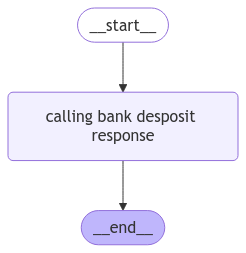

In [12]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

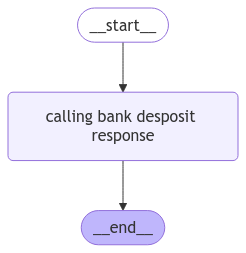

In [13]:
graph

In [14]:
graph.invoke({"message" : ["depost 10000 amount in wajid account and account id is 45729438752"]})

{'message': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'bank_depost', 'arguments': '{"account_id": 45729438752.0, "amount": 10000.0, "name": "wajid"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-9f69afcb-23e2-4209-9ca9-585582013c3d-0', tool_calls=[{'name': 'bank_depost', 'args': {'account_id': 45729438752.0, 'amount': 10000.0, 'name': 'wajid'}, 'id': '04b72a94-164a-4215-a5f7-73036d908731', 'type': 'tool_call'}], usage_metadata={'input_tokens': 114, 'output_tokens': 11, 'total_tokens': 125, 'input_token_details': {'cache_read': 0}})]}

In [15]:
graph.invoke({"message" : ["hi"]})

{'message': [AIMessage(content='Hello! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-e9379e9c-1943-40ed-b5c1-11b05fdaaa5d-0', usage_metadata={'input_tokens': 85, 'output_tokens': 10, 'total_tokens': 95, 'input_token_details': {'cache_read': 0}})]}